In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle
from sklearn import datasets, preprocessing,cross_validation, feature_extraction
from sklearn import linear_model, svm, metrics, ensemble, tree, ensemble
from sklearn.decomposition import PCA
from sklearn.metrics import log_loss
import pandas as pd
import urllib
import csv
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import log_loss
import warnings
from collections import Counter
warnings.filterwarnings("ignore")


Using TensorFlow backend.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import cv2
import numpy as np
import argparse
import time
import glob
import os
import pandas
import sys
import subprocess
import random

cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)
facecascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
facedict = {}
actions = {}
emotions = ["anger","disgust","fear", "happy","neutral","sadness","surprise"]
df = pandas.read_excel("emotion_audio.xlsx") #open Excel file
actions["anger"] = [x for x in df.anger.dropna()] #We need de dropna() when columns are uneven in length, which creates NaN values at missing places. The OS won't know what to do with these if we try to open them.
actions["disgust"] = [x for x in df.disgust.dropna()]
actions["fear"] = [x for x in df.fear.dropna()]
actions["happy"] = [x for x in df.happy.dropna()]
actions["neutral"] = [x for x in df.neutral.dropna()]
actions["sadness"] = [x for x in df.sadness.dropna()]
actions["surprise"] = [x for x in df.surprise.dropna()]


def open_stuff(filename): #Open the file, credit to user4815162342, on the stackoverflow link in the text above
    if sys.platform == "win32":
        os.startfile(filename)
    else:
        opener ="open" if sys.platform == "darwin" else "xdg-open"
        subprocess.call([opener, filename])

def update(emotions):
        run_recognizer(emotions)
        print("saving model")
        fishface.save("trained_emoclassifier.xml")
        print("model saved!")

def crop_face(clahe_image, face):
    for (x, y, w, h) in face:
        faceslice = clahe_image[y:y+h, x:x+w]
        faceslice = cv2.resize(faceslice, (350, 350))
    facedict["face%s" %(len(facedict)+1)] = faceslice
    return faceslice

def update_model(emotions):
    print("Model update mode active")
    check_folders(emotions)
    for i in range(0, len(emotions)):
        save_face(emotions[i])
    print("collected images, looking good! Now updating model...")
    #update(emotions)
    print("Done!")
    cv2.destroyWindow("preview")
    cv2.destroyWindow("webcam")

def check_folders(emotions): #check if folder infrastructure is there, create if absent
    for x in emotions:
        if os.path.exists("sorted_set\\%s" %x):
            pass
        else:
            os.makedirs("sorted_set\\%s" %x)

def save_face(emotion):
    print("\n\nplease look " + emotion + " when the timer expires and keep the expression stable until instructed otherwise.")
    actionlist = [x for x in actions[emotion]] #get list of actions/files for detected emotion
    random.shuffle(actionlist) #Randomly shuffle the list
    open_stuff(actionlist[0])
    for i in range(0,5):#Timer to give you time to read what emotion to express
        print(5-i)
        time.sleep(1)
    while len(facedict.keys()) < 11: #Grab 15 images for each emotion
        grab_webcamframe()
    for x in facedict.keys(): #save contents of dictionary to files
        cv2.imwrite("sorted_set\\%s\\%s.jpg" %(emotion, len(glob.glob("sorted_set\\%s\\*" %emotion))), facedict[x])
    facedict.clear() #clear dictionary so that the next emotion can be stored

def grab_webcamframe():
      
    while True:
        if vc.isOpened(): # try to get the first frame
            rval, frame = vc.read()
        else:
            rval = False
        cv2.imshow("preview", frame)
        key = cv2.waitKey(40)
        if key == 27: # exit on ESC
            break
        if key == 32:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Convert image to grayscale to improve detection speed and accuracy
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            clahe_image = clahe.apply(gray)

            #Run classifier on frame
            face = facecascade.detectMultiScale(clahe_image, scaleFactor=1.1, minNeighbors=15, minSize=(10, 10), flags=cv2.CASCADE_SCALE_IMAGE)

            for (x, y, w, h) in face: #Draw rectangle around detected faces
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2) #draw it on "frame", (coordinates), (size), (RGB color), thickness 2

            if len(face) == 1: #Use simple check if one face is detected, or multiple (measurement error unless multiple persons on image)
                faceslice = crop_face(clahe_image, face)
                cv2.imshow("webcam", frame)
                return faceslice#slice face from image
                #cv2.imshow("detect", faceslice) #display sliced face
                #for x in facedict.keys():
                    #cv2.imwrite("real_set\\%s.jpg" %x, facedict[x])
            else:
                print("no/multiple faces detected, passing over frame")

            #cv2.imshow("webcam", frame) #Display frame

    cv2.destroyWindow("preview")
    cv2.destroyWindow("webcam")


update_model(emotions)
    
   
    

Model update mode active


please look anger when the timer expires and keep the expression stable until instructed otherwise.
5
4
3
2
1
no/multiple faces detected, passing over frame


please look disgust when the timer expires and keep the expression stable until instructed otherwise.
5
4
3
2
1


please look fear when the timer expires and keep the expression stable until instructed otherwise.
5
4
3
2
1


please look happy when the timer expires and keep the expression stable until instructed otherwise.
5
4
3
2
1
no/multiple faces detected, passing over frame


please look neutral when the timer expires and keep the expression stable until instructed otherwise.
5
4
3
2
1


please look sadness when the timer expires and keep the expression stable until instructed otherwise.
5
4
3
2
1
no/multiple faces detected, passing over frame
no/multiple faces detected, passing over frame
no/multiple faces detected, passing over frame


please look surprise when the timer expires and keep the expr

In [2]:
'''img_width, img_height = 350, 350
top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'sorted_set'

nb_train_samples = 1011

epochs = 50
batch_size = 1
def save_bottlebeck_features():
    #Function to compute VGG-16 CNN for image feature extraction.
    train_target = []
    
    datagen = ImageDataGenerator(rescale=1. / 255)
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    generator_train = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    
    for i in generator_train.filenames:
        train_target.append(i[:])
     

    bottleneck_features_train = model.predict_generator(generator_train, nb_train_samples // batch_size)
   
    bottleneck_features_train =  bottleneck_features_train.reshape(1011,51200)
    
   
    np.save(open('data_features.npy', 'wb'), bottleneck_features_train)
    np.save(open('data_labels.npy', 'wb'), np.array(train_target))
save_bottlebeck_features()   ''' 

Found 1011 images belonging to 7 classes.


In [2]:
data = np.load("data_features.npy")
target = np.load("data_labels.npy")

In [3]:
data.shape

(1011, 51200)

In [4]:
target.shape

(1011,)

In [5]:
target

array(['ger\\00_005_00000023.png', 'ger\\09_003_00000017.png',
       'ger\\11_006_00000010.png', ..., 'rprise\\google_157.jpg',
       'rprise\\google_210.jpg', 'rprise\\google_212.jpg'],
      dtype='<U74')

In [6]:
data_y = [target[i].split('\\')[0] for i in range(target.shape[0])]
type(data_y)
data_y = pd.DataFrame(data_y)
type(data_y)
data_y.columns = ['label']
Counter(data_y['label'])

Counter({'ar': 66,
         'dness': 88,
         'ger': 107,
         'ppy': 142,
         'rprise': 137,
         'sgust': 144,
         'utral': 327})

In [7]:
classes = {"label": {"ger": 0, "sgust": 1, "ar": 2, "ppy": 3,
                                  "utral": 4, "dness": 5, "rprise":6 }}
data_y.replace(classes, inplace=True)
print(data_y.head())
print(type(data_y))




   label
0      0
1      0
2      0
3      0
4      0
<class 'pandas.core.frame.DataFrame'>


In [8]:
from sklearn.model_selection import train_test_split
X_train, test_df, y_train, y_test = train_test_split(data, data_y, stratify=data_y, test_size=0.05)
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)
print(train_df.shape)
print(cv_df.shape)
print(test_df.shape)


(768, 51200)
(192, 51200)
(51, 51200)


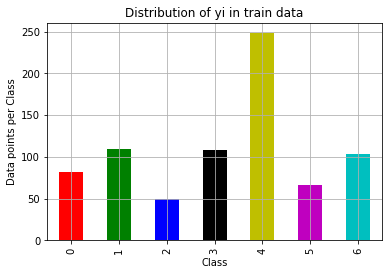

Number of data points in class 4 : 248 ( 32.292 %)
Number of data points in class 1 : 110 ( 14.323 %)
Number of data points in class 3 : 108 ( 14.062 %)
Number of data points in class 6 : 104 ( 13.542 %)
Number of data points in class 0 : 82 ( 10.677 %)
Number of data points in class 5 : 66 ( 8.594 %)
Number of data points in class 2 : 50 ( 6.51 %)
--------------------------------------------------------------------------------


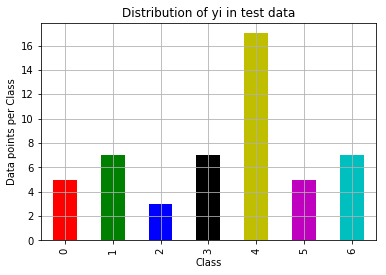

Number of data points in class 4 : 17 ( 33.333 %)
Number of data points in class 1 : 7 ( 13.725 %)
Number of data points in class 3 : 7 ( 13.725 %)
Number of data points in class 6 : 7 ( 13.725 %)
Number of data points in class 0 : 5 ( 9.804 %)
Number of data points in class 5 : 5 ( 9.804 %)
Number of data points in class 2 : 3 ( 5.882 %)
--------------------------------------------------------------------------------


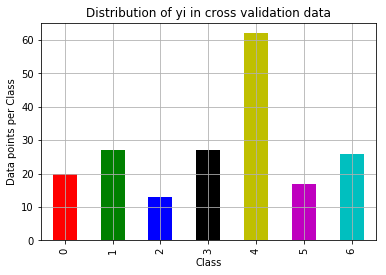

Number of data points in class 4 : 62 ( 32.292 %)
Number of data points in class 1 : 27 ( 14.062 %)
Number of data points in class 3 : 27 ( 14.062 %)
Number of data points in class 6 : 26 ( 13.542 %)
Number of data points in class 0 : 20 ( 10.417 %)
Number of data points in class 5 : 17 ( 8.854 %)
Number of data points in class 2 : 13 ( 6.771 %)


In [10]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train['label'].value_counts().sortlevel()
test_class_distribution = y_test['label'].value_counts().sortlevel()
cv_class_distribution = y_cv['label'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


In [11]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1,2,3,4,5,6]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.17349806561
Log loss on Test Data using Random Model 2.20801684963
-------------------- Confusion matrix --------------------


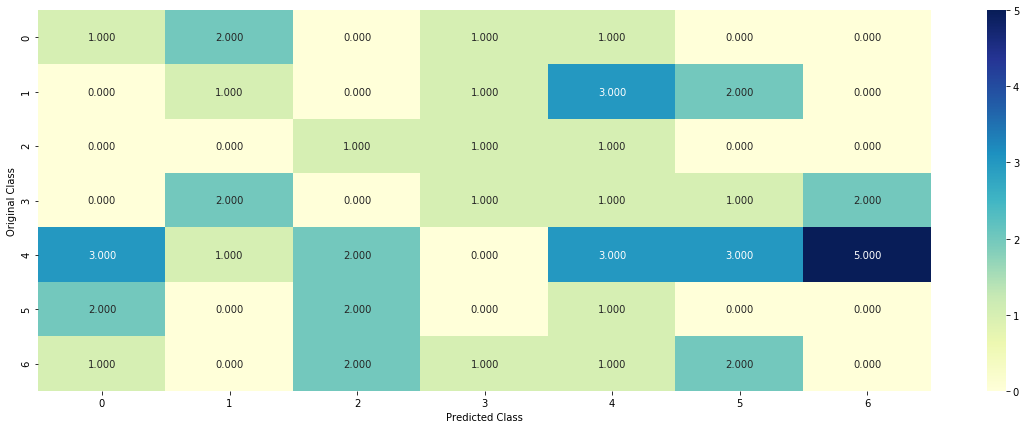

-------------------- Precision matrix (Columm Sum=1) --------------------


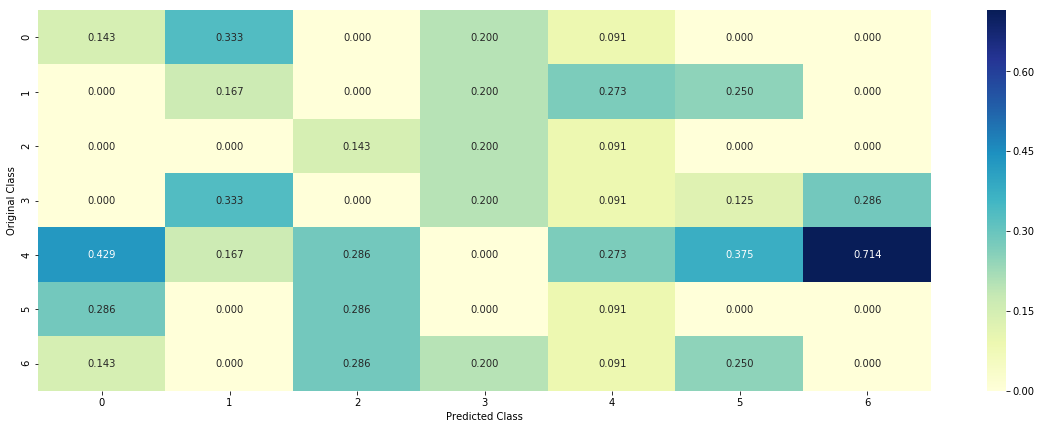

-------------------- Recall matrix (Row sum=1) --------------------


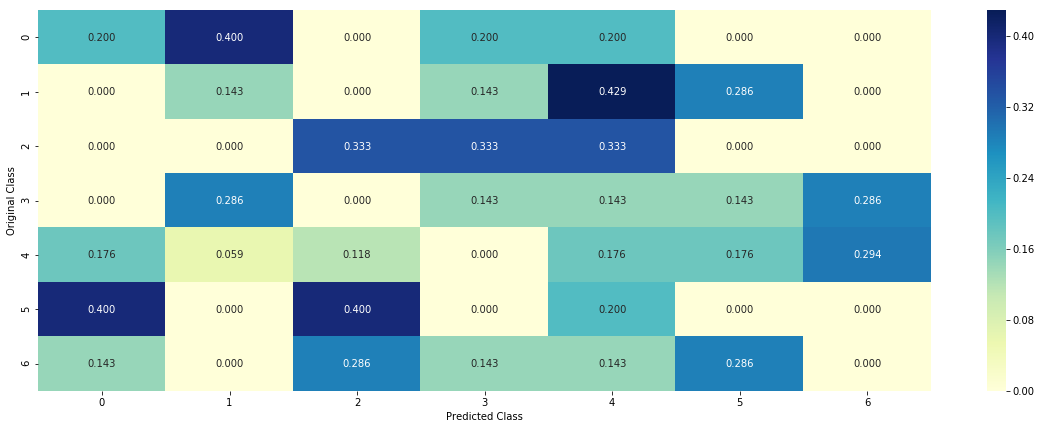

In [12]:
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,7))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,7)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,7))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,7)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 1.08338922232
For values of alpha =  0.0001 The log loss is: 1.07573906695
For values of alpha =  0.001 The log loss is: 1.09499167677
For values of alpha =  0.01 The log loss is: 1.05787779589
For values of alpha =  0.1 The log loss is: 1.05345333584
For values of alpha =  1 The log loss is: 1.04012991556


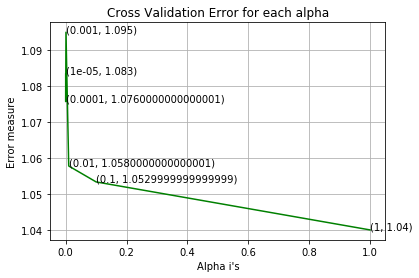

For values of best alpha =  1 The train log loss is: 0.687790978543
For values of best alpha =  1 The cross validation log loss is: 1.04012991556
For values of best alpha =  1 The test log loss is: 0.947516779547
-------------------- Confusion matrix --------------------


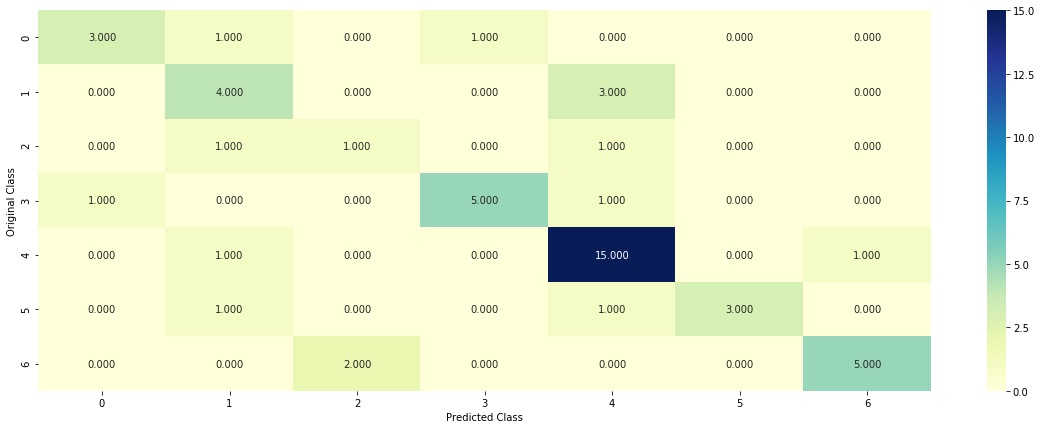

-------------------- Precision matrix (Columm Sum=1) --------------------


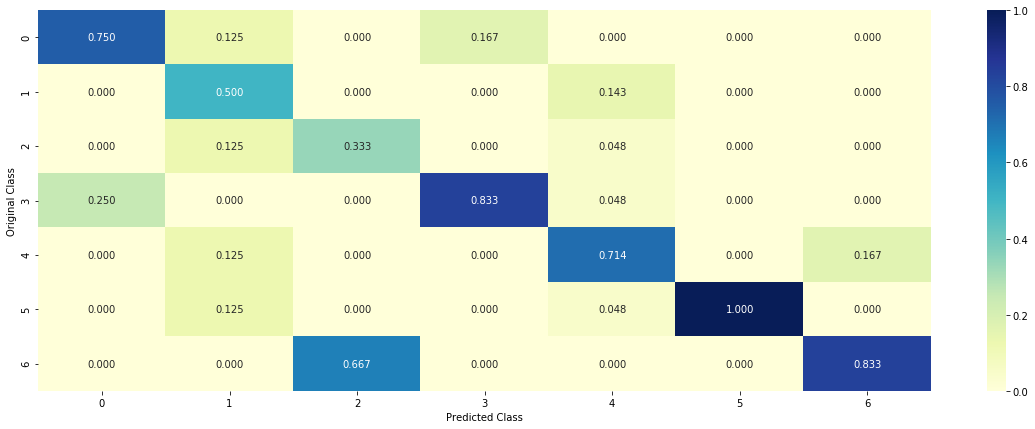

-------------------- Recall matrix (Row sum=1) --------------------


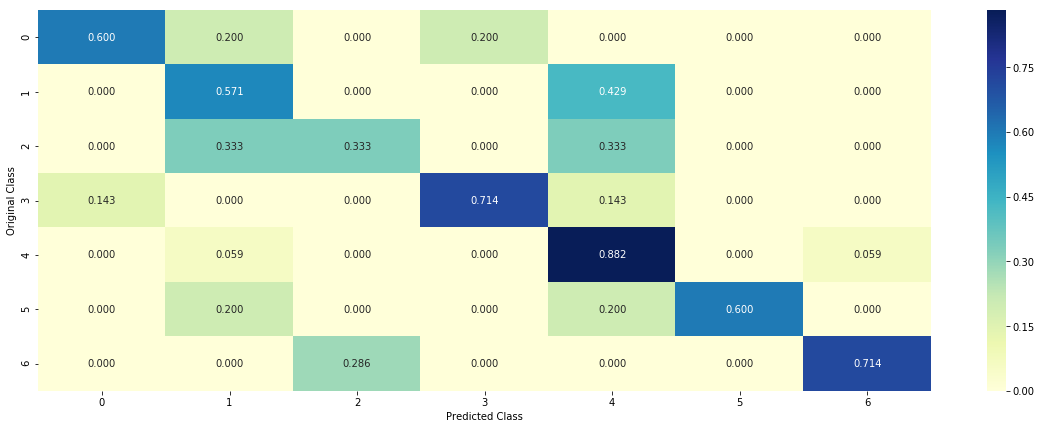

In [13]:
alpha = [10 ** x for x in range(-5, 1)]
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    predict_y = sig_clf.predict_proba(cv_df)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

for alpha = 5
Log Loss : 1.33502517791
for alpha = 11
Log Loss : 1.26318748578
for alpha = 15
Log Loss : 1.24586506811
for alpha = 21
Log Loss : 1.23858168969
for alpha = 31
Log Loss : 1.25133703595
for alpha = 41
Log Loss : 1.26819932935
for alpha = 51
Log Loss : 1.29163830653
for alpha = 99
Log Loss : 1.3838940768


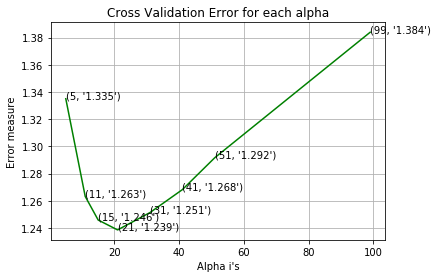

For values of best alpha =  21 The train log loss is: 1.13836352362
For values of best alpha =  21 The cross validation log loss is: 1.23858168969
For values of best alpha =  21 The test log loss is: 1.19100240199
-------------------- Confusion matrix --------------------


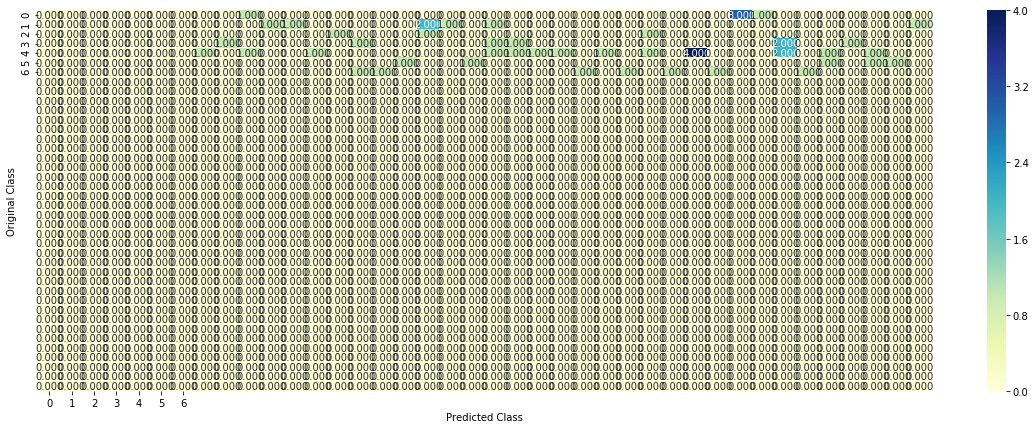

-------------------- Precision matrix (Columm Sum=1) --------------------


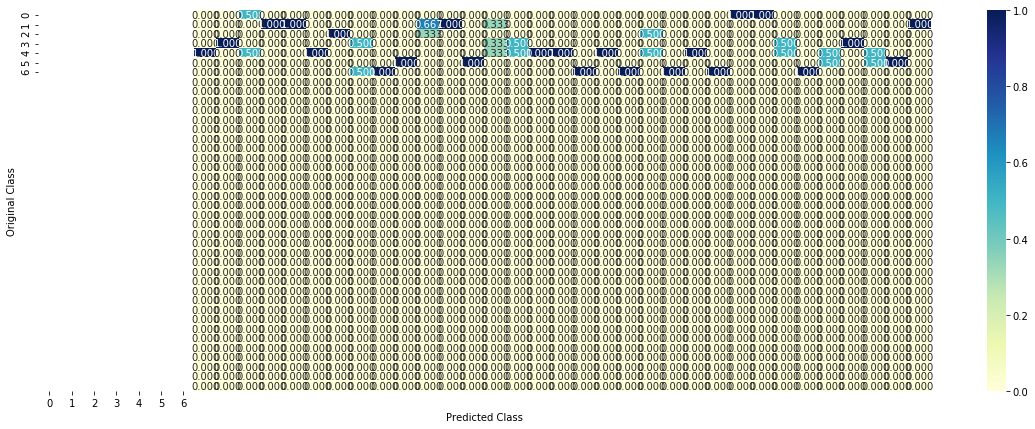

-------------------- Recall matrix (Row sum=1) --------------------


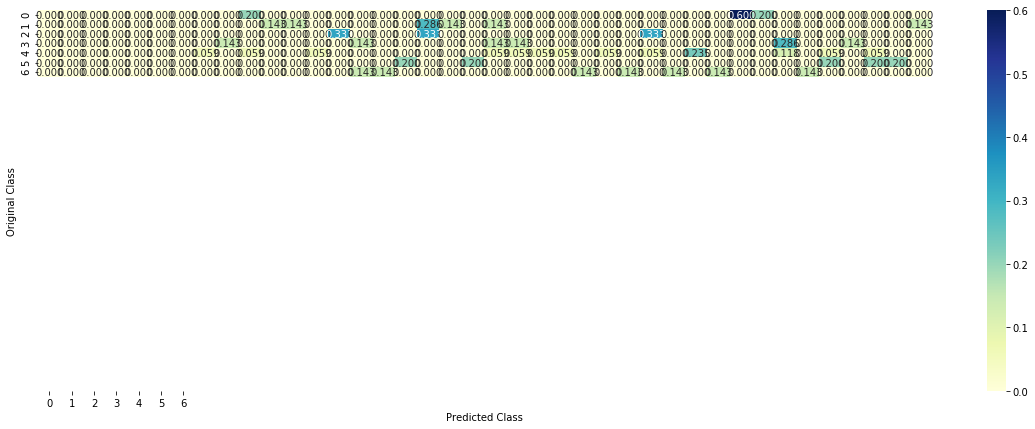

In [38]:
from sklearn.neighbors import KNeighborsClassifier
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))



-------------------- Confusion matrix --------------------


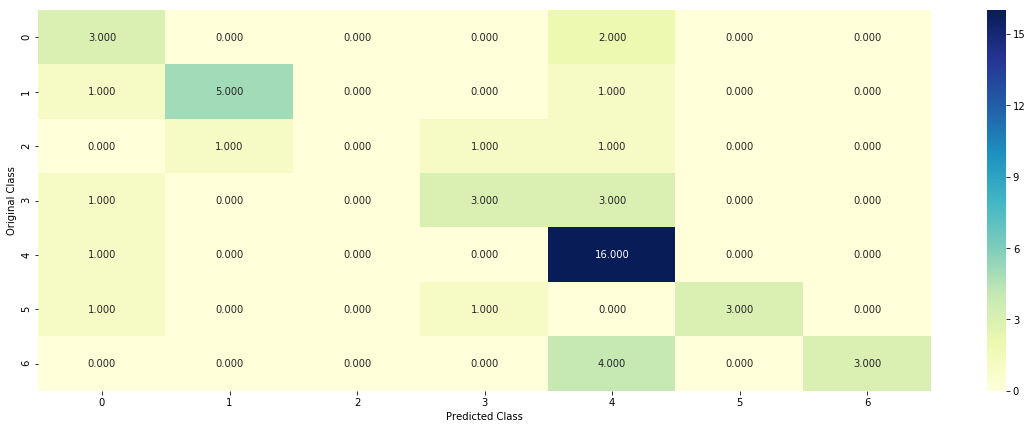

-------------------- Precision matrix (Columm Sum=1) --------------------


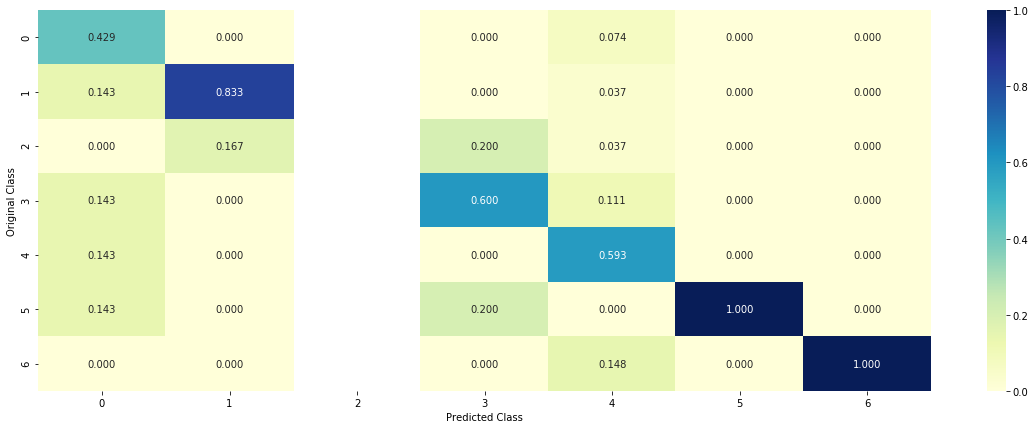

-------------------- Recall matrix (Row sum=1) --------------------


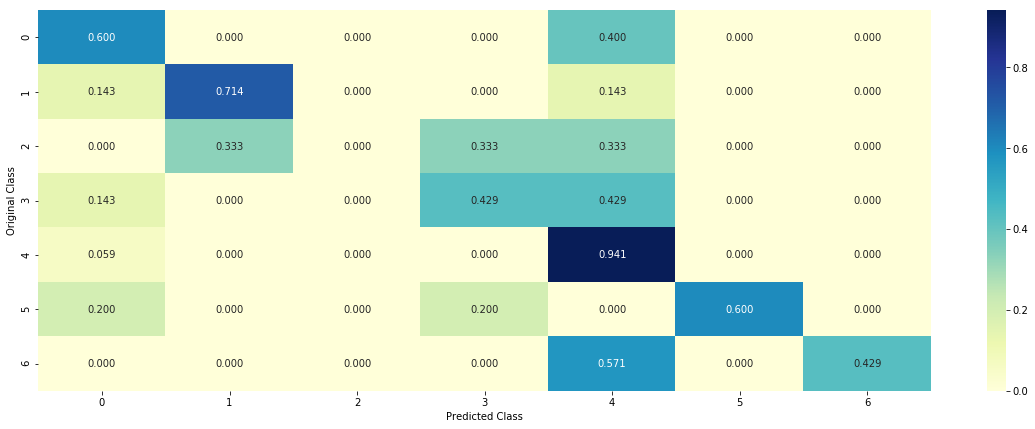

In [39]:
predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.989927210108
For values of alpha =  0.0001 The log loss is: 0.964009546807
For values of alpha =  0.001 The log loss is: 0.963867471516
For values of alpha =  0.01 The log loss is: 0.978073431965
For values of alpha =  0.1 The log loss is: 0.980049959576
For values of alpha =  1 The log loss is: 0.988492805852


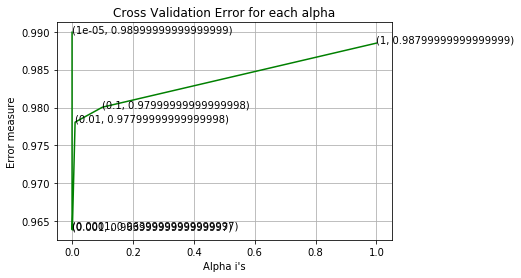

For values of best alpha =  0.001 The train log loss is: 0.74524629205
For values of best alpha =  0.001 The cross validation log loss is: 0.963867471516
For values of best alpha =  0.001 The test log loss is: 0.92298539135
-------------------- Confusion matrix --------------------


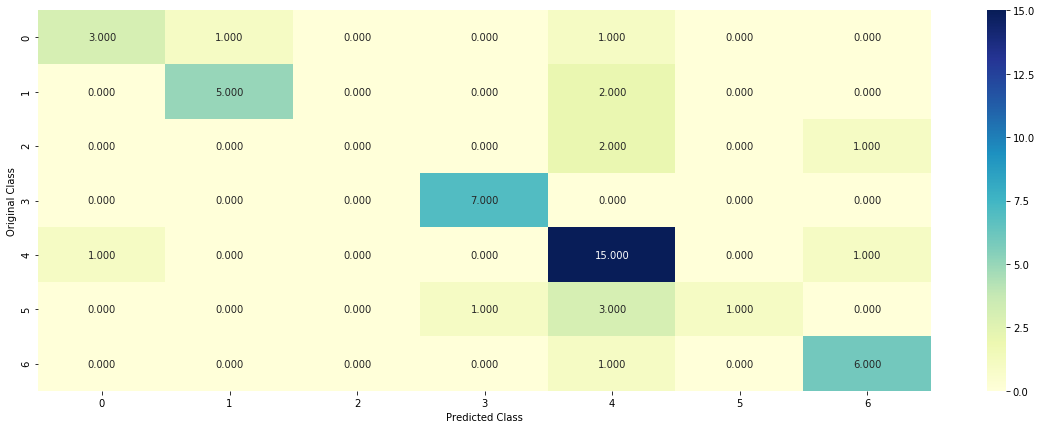

-------------------- Precision matrix (Columm Sum=1) --------------------


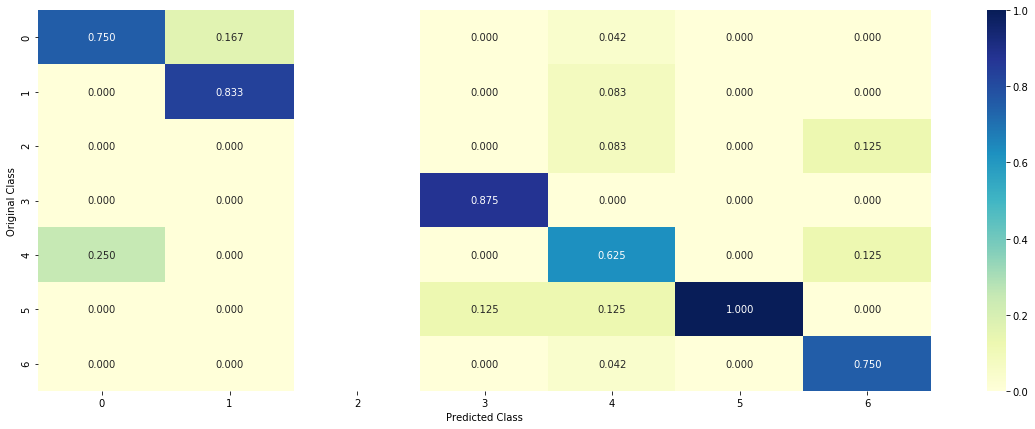

-------------------- Recall matrix (Row sum=1) --------------------


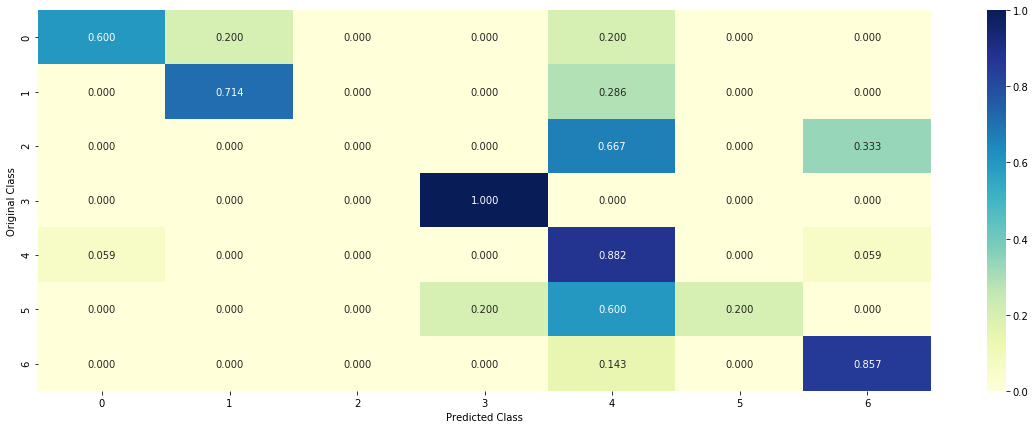

In [13]:
alpha = [10 ** x for x in range(-5, 1)]
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    predict_y = sig_clf.predict_proba(cv_df)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [14]:

def save_webcam_features():
    img_width, img_height = 350, 350
    top_model_weights_path = 'bottleneck_fc_model.h5'
    train_data_dir = 'real_set'

    nb_train_samples = 1

    epochs = 50
    batch_size = 1
    
    #Function to compute VGG-16 CNN for image feature extraction.
    train_target = []
    
    datagen = ImageDataGenerator(rescale=1. / 255)
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    generator_train = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    
    for i in generator_train.filenames:
        train_target.append(i[2:])
     

    bottleneck_features_train = model.predict_generator(generator_train, nb_train_samples // batch_size)
   
    bottleneck_features_train =  bottleneck_features_train.reshape(1,51200)
    print(bottleneck_features_train.shape)
    np.save(open('real_features.npy', 'wb'), bottleneck_features_train)
    np.save(open('real_labels.npy', 'wb'), np.array(train_target))
    prediction()
    


In [15]:
def prediction():
    predictions = []
    features = np.load('real_features.npy')
    labels = np.load('real_labels.npy')
    predictions  = sig_clf.predict_proba(features)
    
    print(predictions)
    emotion = []
    emotion = sig_clf.predict(features)
    for i in range(len(emotion)):
        if emotion[i] == 0:
             print("I guess you are angry")
        elif emotion[i] == 1:
             print("I guess you are disgust")
        elif emotion[i] == 2:
             print("I guess you are fear")
        elif emotion[i] == 3:
             print("I guess you are happy")   
        elif emotion[i] == 4:
             print("I guess you are neutral")
        elif emotion[i] == 5:
             print("I guess you are sad")
        elif emotion[i] == 6:
             print("I guess you are surprise") 
    cv2.destroyWindow("preview")

In [16]:
import cv2
import numpy as np
import time
from PIL import Image
cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)
facecascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

def crop_face(clahe_image, face):
    for (x, y, w, h) in face:
        faceslice = clahe_image[y:y+h, x:x+w]
        faceslice = cv2.resize(faceslice, (350, 350))
    facedict["face%s" %(len(facedict)+1)] = faceslice
    return faceslice

while True:
    facedict = {}
    if vc.isOpened(): # try to get the first frame
        rval, frame = vc.read()
    else:
        rval = False
    cv2.imshow("preview", frame)
    key = cv2.waitKey(40)
    if key == 27: # exit on ESC
        break
    if key == 32:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Convert image to grayscale to improve detection speed and accuracy
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        clahe_image = clahe.apply(gray)

        #Run classifier on frame
        face = facecascade.detectMultiScale(clahe_image, scaleFactor=1.1, minNeighbors=15, minSize=(10, 10), flags=cv2.CASCADE_SCALE_IMAGE)

        for (x, y, w, h) in face: #Draw rectangle around detected faces
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2) #draw it on "frame", (coordinates), (size), (RGB color), thickness 2

        if len(face) == 1: #Use simple check if one face is detected, or multiple (measurement error unless multiple persons on image)
            faceslice = crop_face(clahe_image, face)
    
             
            for x in facedict.keys():
                cv2.imwrite("real_set\\1\\%s.jpg" %x, facedict[x])
                save_webcam_features()
                
        else:
            print("no/multiple faces detected, passing over frame")

        #cv2.imshow("webcam", frame) #Display frame
        
cv2.destroyWindow("preview")
#cv2.destroyWindow("webcam")
    

Found 1 images belonging to 1 classes.
(1, 51200)
[[ 0.34967315  0.11727018  0.0890488   0.0689501   0.18230917  0.17285559
   0.01989302]]
I guess you are angry
Found 1 images belonging to 1 classes.
(1, 51200)
[[ 0.12203136  0.14605999  0.1041504   0.18704238  0.17731538  0.25403873
   0.00936176]]
I guess you are sad
Found 1 images belonging to 1 classes.
(1, 51200)
[[ 0.01773913  0.06425239  0.1779551   0.01047738  0.20463617  0.12648495
   0.39845487]]
I guess you are surprise
Found 1 images belonging to 1 classes.
(1, 51200)
[[ 0.20477708  0.0785304   0.15502791  0.10610627  0.2810488   0.15865275
   0.01585678]]
I guess you are neutral
Found 1 images belonging to 1 classes.
(1, 51200)
[[ 0.04503966  0.08451526  0.10716449  0.37854503  0.15039579  0.22465856
   0.0096812 ]]
I guess you are happy


In [18]:
cv2.destroyWindow("preview")